**Can network fit random labels?**

Epoch 1/20 - Train Loss: 2.3034, Test Loss: 2.3036
Epoch 2/20 - Train Loss: 2.2999, Test Loss: 2.3027
Epoch 3/20 - Train Loss: 2.2977, Test Loss: 2.3129
Epoch 4/20 - Train Loss: 2.2953, Test Loss: 2.3070
Epoch 5/20 - Train Loss: 2.2930, Test Loss: 2.3097
Epoch 6/20 - Train Loss: 2.2906, Test Loss: 2.3127
Epoch 7/20 - Train Loss: 2.2881, Test Loss: 2.3131
Epoch 8/20 - Train Loss: 2.2853, Test Loss: 2.3083
Epoch 9/20 - Train Loss: 2.2826, Test Loss: 2.3119
Epoch 10/20 - Train Loss: 2.2800, Test Loss: 2.3154
Epoch 11/20 - Train Loss: 2.2772, Test Loss: 2.3192
Epoch 12/20 - Train Loss: 2.2742, Test Loss: 2.3128
Epoch 13/20 - Train Loss: 2.2713, Test Loss: 2.3133
Epoch 14/20 - Train Loss: 2.2683, Test Loss: 2.3127
Epoch 15/20 - Train Loss: 2.2654, Test Loss: 2.3230
Epoch 16/20 - Train Loss: 2.2621, Test Loss: 2.3328
Epoch 17/20 - Train Loss: 2.2590, Test Loss: 2.3178
Epoch 18/20 - Train Loss: 2.2560, Test Loss: 2.3210
Epoch 19/20 - Train Loss: 2.2525, Test Loss: 2.3468
Epoch 20/20 - Train L

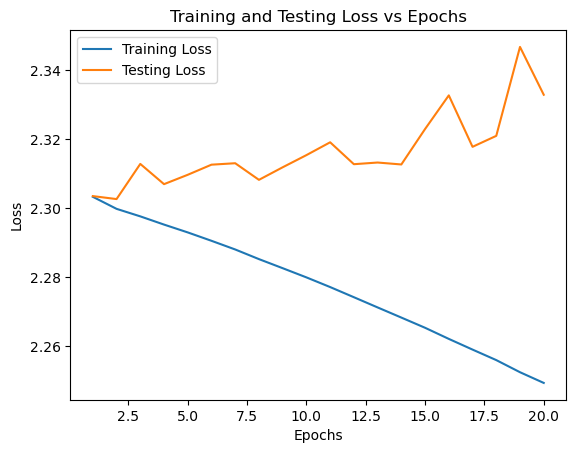

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
def load_data():
    transform = transforms.Compose([transforms.ToTensor()])
    train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=False)
    return train_loader, test_loader

# Shuffle labels
def shuffle_labels(dataset):
    targets = np.array(dataset.targets)
    np.random.shuffle(targets)
    dataset.targets = torch.tensor(targets)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.size(0)
        
        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Evaluate on test set
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                running_test_loss += loss.item() * data.size(0)
        
        test_loss = running_test_loss / len(test_loader.dataset)
        test_losses.append(test_loss)
        
        print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    return train_losses, test_losses

# Main execution
def main():
    train_loader, test_loader = load_data()
    shuffle_labels(train_loader.dataset)  # Shuffle labels for training set
    
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    train_losses, test_losses = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=20)
    
    # Plotting
    plt.plot(range(1, 21), train_losses, label='Training Loss')
    plt.plot(range(1, 21), test_losses, label='Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Testing Loss vs Epochs')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

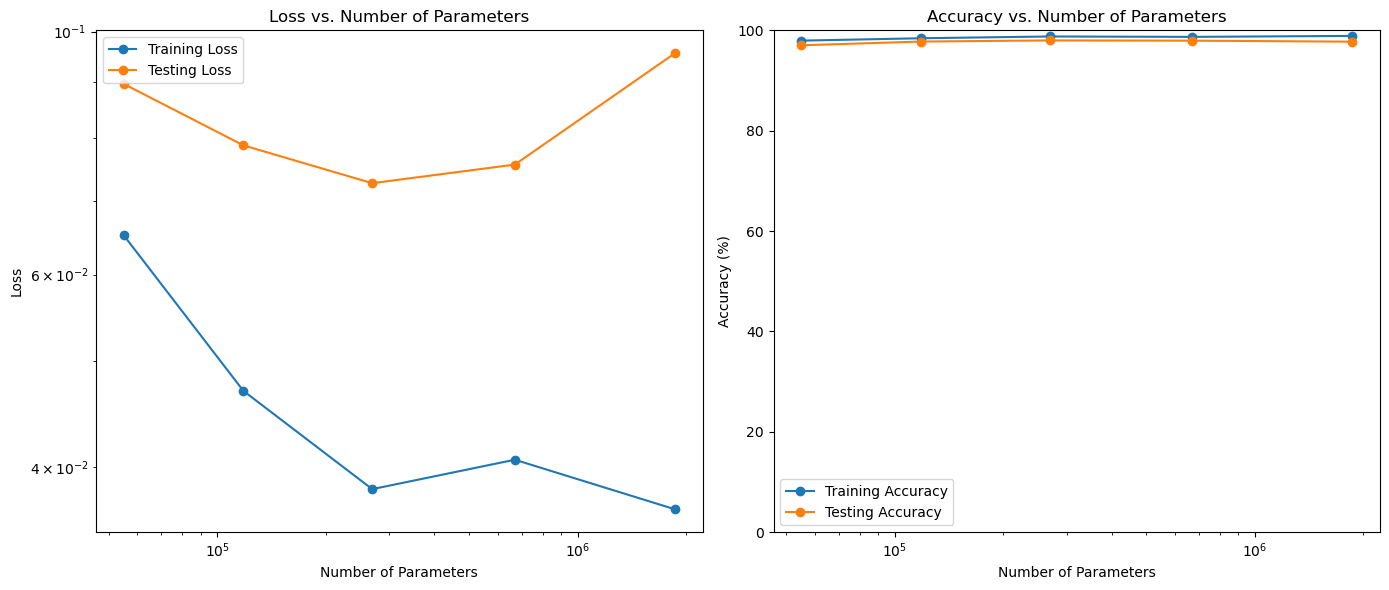

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the network with variable parameters
class VariableNN(nn.Module):
    def __init__(self, hidden_units):
        super(VariableNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to compute the number of parameters in a model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

# Training function
def train_and_evaluate(hidden_units, train_loader, test_loader, num_epochs=5):
    model = VariableNN(hidden_units)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0
        
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total_train += target.size(0)
            correct_train += (predicted == target).sum().item()
        
        avg_train_loss = total_train_loss / len(train_loader)
        avg_train_accuracy = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_accuracy)

        model.eval()
        total_test_loss = 0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                total_test_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                total_test += target.size(0)
                correct_test += (predicted == target).sum().item()
                
        avg_test_loss = total_test_loss / len(test_loader)
        avg_test_accuracy = 100 * correct_test / total_test
        test_losses.append(avg_test_loss)
        test_accuracies.append(avg_test_accuracy)

    return avg_train_loss, avg_test_loss, avg_train_accuracy, avg_test_accuracy, count_parameters(model)

# Prepare data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define hidden units and run experiments
hidden_units_list = [64, 128, 256, 512, 1024]
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
param_counts = []

for hidden_units in hidden_units_list:
    avg_train_loss, avg_test_loss, avg_train_accuracy, avg_test_accuracy, param_count = train_and_evaluate(hidden_units, train_loader, test_loader)
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_accuracies.append(avg_train_accuracy)
    test_accuracies.append(avg_test_accuracy)
    param_counts.append(param_count)
    
# Plot results
plt.figure(figsize=(14, 6))

# Plot Losses
plt.subplot(1, 2, 1)
plt.plot(param_counts, train_losses, marker='o', label='Training Loss')
plt.plot(param_counts, test_losses, marker='o', label='Testing Loss')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Parameters')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Plot Accuracies
plt.subplot(1, 2, 2)
plt.plot(param_counts, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(param_counts, test_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Parameters')
plt.xscale('log')
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the network with variable parameters
class VariableNN(nn.Module):
    def __init__(self, hidden_units):
        super(VariableNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_units[0])  # First hidden layer
        self.fc2 = nn.Linear(hidden_units[0], hidden_units[1])  # Second hidden layer
        self.fc3 = nn.Linear(hidden_units[1], 10)  # Output layer with 10 classes (MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage
model = VariableNN([256, 128])  # You can pass a list of hidden units sizes
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1/5 | Train Accuracy: 93.17% | Test Accuracy: 96.58% | Frobenius Norm: 0.4614
Epoch 2/5 | Train Accuracy: 97.17% | Test Accuracy: 97.34% | Frobenius Norm: 1.7322
Epoch 3/5 | Train Accuracy: 97.95% | Test Accuracy: 97.81% | Frobenius Norm: 0.2366
Epoch 4/5 | Train Accuracy: 98.37% | Test Accuracy: 97.84% | Frobenius Norm: 1.6607
Epoch 5/5 | Train Accuracy: 98.65% | Test Accuracy: 97.80% | Frobenius Norm: 0.0457

--- After Weight Perturbation ---
Epoch 1/5 | Train Accuracy: 98.82% | Test Accuracy: 97.65% | Frobenius Norm: 0.4196
Epoch 2/5 | Train Accuracy: 98.99% | Test Accuracy: 97.60% | Frobenius Norm: 1.2326
Epoch 3/5 | Train Accuracy: 99.16% | Test Accuracy: 97.87% | Frobenius Norm: 1.4393
Epoch 4/5 | Train Accuracy: 99.23% | Test Accuracy: 98.02% | Frobenius Norm: 1.6282
Epoch 5/5 | Train Accuracy: 99.30% | Test Accuracy: 97.48% | Frobenius Norm: 0.1603


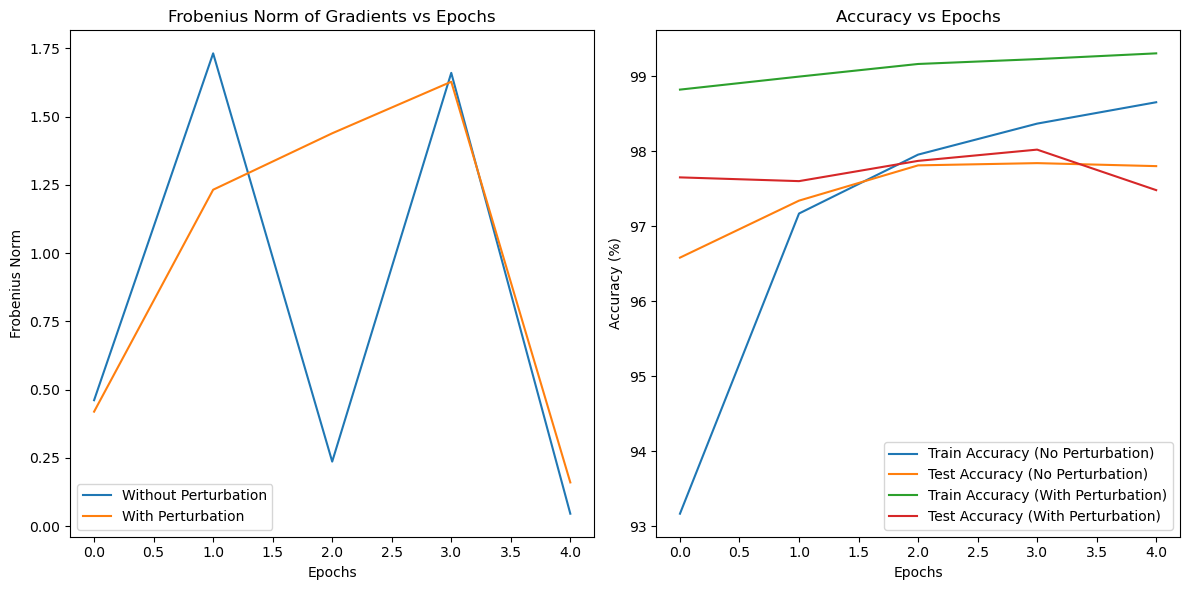

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Frobenius norm function for gradients
def frobenius_norm(gradients):
    squared_sum = sum((g ** 2).sum() for g in gradients)
    return torch.sqrt(squared_sum).item()

# Perturbation of model weights
def perturb_weights(model, epsilon=0.01):
    for param in model.parameters():
        param.data += epsilon * torch.randn_like(param)

# Train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=False):
    train_accuracies = []
    test_accuracies = []
    frobenius_norms = []
    
    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        total_train_loss = 0
        gradients = []

        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()

            # Collect gradients for Frobenius norm calculation
            gradients = [param.grad for param in model.parameters()]
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

        # Calculate Frobenius norm of gradients (flatness)
        fro_norm = frobenius_norm(gradients)
        frobenius_norms.append(fro_norm)

        train_accuracy = correct_train / total_train * 100
        train_accuracies.append(train_accuracy)

        # Evaluate on test data
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                _, predicted = torch.max(output, 1)
                correct_test += (predicted == target).sum().item()
                total_test += target.size(0)

        test_accuracy = correct_test / total_test * 100
        test_accuracies.append(test_accuracy)

        # Perturb weights for Part (b)
        if perturb:
            perturb_weights(model)

        print(f"Epoch {epoch+1}/{epochs} | Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}% | Frobenius Norm: {fro_norm:.4f}")

    return train_accuracies, test_accuracies, frobenius_norms

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Initialize the model, criterion, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and evaluate flatness and generalization
train_acc, test_acc, frob_norms = train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=False)

# Part (b): Perturb weights and repeat the evaluation
print("\n--- After Weight Perturbation ---")
train_acc_perturb, test_acc_perturb, frob_norms_perturb = train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=True)

# Plotting results
plt.figure(figsize=(12, 6))

# Plot Frobenius norm vs epochs
plt.subplot(1, 2, 1)
plt.plot(frob_norms, label='Without Perturbation')
plt.plot(frob_norms_perturb, label='With Perturbation')
plt.title('Frobenius Norm of Gradients vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Frobenius Norm')
plt.legend()

# Plot accuracy vs epochs
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy (No Perturbation)')
plt.plot(test_acc, label='Test Accuracy (No Perturbation)')
plt.plot(train_acc_perturb, label='Train Accuracy (With Perturbation)')
plt.plot(test_acc_perturb, label='Test Accuracy (With Perturbation)')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plotting Accuracy and Loss for Training and Testing (Part 1)
plt.figure(figsize=(12, 6))
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Frobenius norm function for gradients
def frobenius_norm(gradients):
    squared_sum = sum((g ** 2).sum() for g in gradients)
    return torch.sqrt(squared_sum).item()

# Perturbation of model weights
def perturb_weights(model, epsilon=0.01):
    for param in model.parameters():
        param.data += epsilon * torch.randn_like(param)

# Train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=False):
    train_accuracies = []
    test_accuracies = []
    frobenius_norms = []
    
    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        total_train_loss = 0
        gradients = []

        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()

            # Collect gradients for Frobenius norm calculation
            gradients = [param.grad for param in model.parameters()]
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

        # Calculate Frobenius norm of gradients (flatness)
        fro_norm = frobenius_norm(gradients)
        frobenius_norms.append(fro_norm)

        train_accuracy = correct_train / total_train * 100
        train_accuracies.append(train_accuracy)

        # Evaluate on test data
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                _, predicted = torch.max(output, 1)
                correct_test += (predicted == target).sum().item()
                total_test += target.size(0)

        test_accuracy = correct_test / total_test * 100
        test_accuracies.append(test_accuracy)

        # Perturb weights for Part (b)
        if perturb:
            perturb_weights(model)

        print(f"Epoch {epoch+1}/{epochs} | Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}% | Frobenius Norm: {fro_norm:.4f}")

    return train_accuracies, test_accuracies, frobenius_norms

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Initialize the model, criterion, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and evaluate flatness and generalization
train_acc, test_acc, frob_norms = train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=False)

# Part (b): Perturb weights and repeat the evaluation
print("\n--- After Weight Perturbation ---")
train_acc_perturb, test_acc_perturb, frob_norms_perturb = train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=True)

# Plotting results
plt.figure(figsize=(12, 6))


# Plot Training Accuracy and Loss
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy (Batch Size 64)')
plt.plot(test_acc, label='Test Accuracy (Batch Size 64)')
plt.plot(train_acc, label='Train Accuracy (Batch Size 1024)')
plt.plot(test_acc_perturb, label='Test Accuracy (Batch Size 1024)')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot Loss (Training and Testing)
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss (Batch Size 64)')
plt.plot(test_losses, label='Test Loss (Batch Size 64)')
plt.plot(train_losses_perturb, label='Train Loss (Batch Size 1024)')
plt.plot(test_losses_perturb, label='Test Loss (Batch Size 1024)')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Sensitivity and Accuracy vs Batch Size Plot (Part 2)
batch_sizes = [64, 128, 256, 512, 1024]  # Example batch sizes
# Plotting Accuracy and Loss for Training and Testing (Part 1)
plt.figure(figsize=(12, 6))
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Frobenius norm function for gradients
def frobenius_norm(gradients):
    squared_sum = sum((g ** 2).sum() for g in gradients)
    return torch.sqrt(squared_sum).item()

# Perturbation of model weights
def perturb_weights(model, epsilon=0.01):
    for param in model.parameters():
        param.data += epsilon * torch.randn_like(param)

# Train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=False):
    train_accuracies = []
    test_accuracies = []
    frobenius_norms = []
    
    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        total_train_loss = 0
        gradients = []

        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()

            # Collect gradients for Frobenius norm calculation
            gradients = [param.grad for param in model.parameters()]
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

        # Calculate Frobenius norm of gradients (flatness)
        fro_norm = frobenius_norm(gradients)
        frobenius_norms.append(fro_norm)

        train_accuracy = correct_train / total_train * 100
        train_accuracies.append(train_accuracy)

        # Evaluate on test data
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                _, predicted = torch.max(output, 1)
                correct_test += (predicted == target).sum().item()
                total_test += target.size(0)

        test_accuracy = correct_test / total_test * 100
        test_accuracies.append(test_accuracy)

        # Perturb weights for Part (b)
        if perturb:
            perturb_weights(model)

        print(f"Epoch {epoch+1}/{epochs} | Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}% | Frobenius Norm: {fro_norm:.4f}")

    return train_accuracies, test_accuracies, frobenius_norms

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Initialize the model, criterion, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and evaluate flatness and generalization
train_acc, test_acc, frob_norms = train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=False)

# Part (b): Perturb weights and repeat the evaluation
print("\n--- After Weight Perturbation ---")
train_acc_perturb, test_acc_perturb, frob_norms_perturb = train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5, perturb=True)

# Plotting results
plt.figure(figsize=(12, 6))


# Plot Training Accuracy and Loss
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy (Batch Size 64)')
plt.plot(test_acc, label='Test Accuracy (Batch Size 64)')
plt.plot(train_accuracies, label='Train Accuracy (Batch Size 1024)')
plt.plot(test_acc_perturb, label='Test Accuracy (Batch Size 1024)')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot Loss (Training and Testing)
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss (Batch Size 64)')
plt.plot(test_losses, label='Test Loss (Batch Size 64)')
plt.plot(train_losses_perturb, label='Train Loss (Batch Size 1024)')
plt.plot(test_losses_perturb, label='Test Loss (Batch Size 1024)')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# Accuracy vs Batch Size
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, , marker='o', label='Train Accuracy')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Batch Size')
plt.legend()

# Sensitivity vs Batch Size
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, frobenius_norms, marker='o', label='Sensitivity')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Sensitivity (Frobenius Norm)')
plt.title('Sensitivity vs Batch Size')
plt.legend()

plt.tight_layout()
plt.show()
